In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [99]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [100]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [101]:
df.shape

(26707, 34)

In [102]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [103]:
df.drop(['unique_id'], inplace = True, axis = 1)

In [104]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [105]:
mode1=df["h1n1_worry"].mode()[0]
mode1

2.0

In [106]:
df["h1n1_worry"]=df["h1n1_worry"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [107]:
mode1=df["h1n1_awareness"].mode()[0]
mode1

1.0

In [108]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [109]:
mode1=df["antiviral_medication"].mode()[0]
mode1

0.0

In [110]:
df["antiviral_medication"]=df["antiviral_medication"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [111]:
mode1=df["contact_avoidance"].mode()[0]
mode1

1.0

In [112]:
df["contact_avoidance"]=df["contact_avoidance"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [113]:
mode1=df["bought_face_mask"].mode()[0]
mode1

0.0

In [114]:
df["bought_face_mask"]=df["bought_face_mask"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [115]:
mode1=df["wash_hands_frequently"].mode()[0]
mode1

1.0

In [116]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [117]:
mode1=df["avoid_large_gatherings"].mode()[0]
mode1

0.0

In [118]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [119]:
mode1=df["reduced_outside_home_cont"].mode()[0]
mode1

0.0

In [120]:
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [121]:
mode1=df["avoid_touch_face"].mode()[0]
mode1

1.0

In [122]:
df["avoid_touch_face"]=df["avoid_touch_face"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [123]:
mode1=df["dr_recc_h1n1_vacc"].mode()[0]
mode1

0.0

In [124]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [125]:
mode1=df["dr_recc_seasonal_vacc"].mode()[0]
mode1

0.0

In [126]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [127]:
mode1=df["chronic_medic_condition"].mode()[0]
mode1

0.0

In [128]:
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [129]:
mode1=df["cont_child_undr_6_mnths"].mode()[0]
mode1

0.0

In [130]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [131]:
mode1=df["is_health_worker"].mode()[0]
mode1

0.0

In [132]:
df["is_health_worker"]=df["is_health_worker"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [133]:
#As no of missing values is 12274 which is almost equal to no of persons who have health insurance. Therefore, it is not a good option to replace missing values by mode as there is no surity whether they have insurance. Hence, putting them in another category named '2.0' which means 'data unknown'.

In [134]:
df["has_health_insur"]=df["has_health_insur"].replace(np.nan,2.0)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [135]:
mode1=df["is_h1n1_vacc_effective"].mode()[0]
mode1

4.0

In [136]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [137]:
mode1=df["is_seas_vacc_effective"].mode()[0]
mode1

4.0

In [138]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [139]:
mode1=df["sick_from_h1n1_vacc"].mode()[0]
mode1

2.0

In [140]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [141]:
mode1=df["sick_from_seas_vacc"].mode()[0]
mode1

1.0

In [142]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [143]:
mode1=df["qualification"].mode()[0]
mode1

'College Graduate'

In [144]:
df["qualification"]=df["qualification"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [145]:
df["income_level"]=df["income_level"].replace(np.nan,'unknown')
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [146]:
mode1=df["marital_status"].mode()[0]
mode1

'Married'

In [147]:
df["marital_status"]=df["marital_status"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status               2042
employment                   1463
census_msa    

In [148]:
mode1=df["housing_status"].mode()[0]
mode1

'Own'

In [149]:
df["housing_status"]=df["housing_status"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status                  0
employment                   1463
census_msa    

In [150]:
mode1=df["employment"].mode()[0]
mode1

'Employed'

In [151]:
df["employment"]=df["employment"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                388
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                514
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa                     0
no_of_adul

In [152]:
mode1=df["no_of_adults"].mode()[0]
mode1

1.0

In [153]:
df["no_of_adults"]=df["no_of_adults"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                388
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                514
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa                     0
no_of_adul

In [154]:
mode1=df["no_of_children"].mode()[0]
mode1

0.0

In [155]:
df["no_of_children"]=df["no_of_children"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                388
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                514
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa                     0
no_of_adul

In [156]:
mode1=df["is_h1n1_risky"].mode()[0]
mode1

2.0

In [157]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                  0
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                514
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa                     0
no_of_adul

In [158]:
mode1=df["is_seas_risky"].mode()[0]
mode1

2.0

In [159]:
df["is_seas_risky"]=df["is_seas_risky"].replace(np.nan,mode1)
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

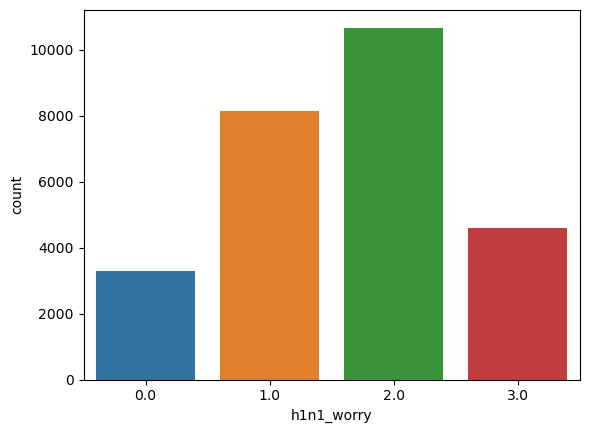

In [161]:
sns.countplot(x="h1n1_worry",data=df)
plt.show()

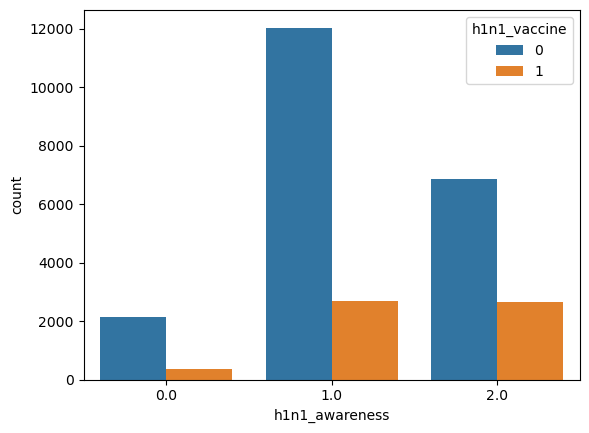

In [167]:
sns.countplot(x="h1n1_awareness",data=df,hue = 'h1n1_vaccine')
plt.show()

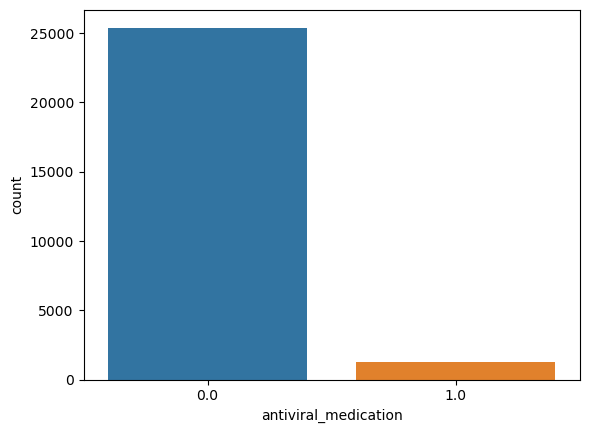

In [169]:
sns.countplot(x="antiviral_medication",data=df)
plt.show()

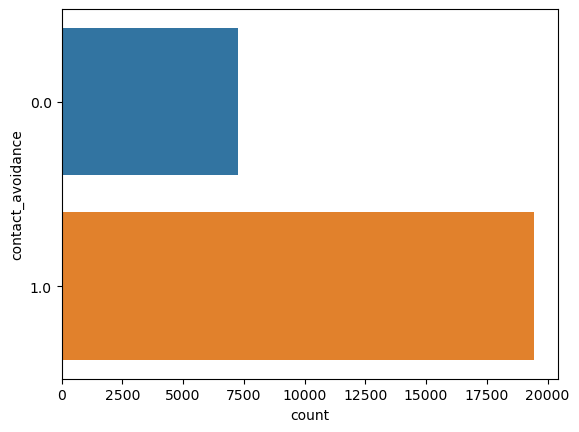

In [174]:
sns.countplot(y = "contact_avoidance",data=df)
plt.show()

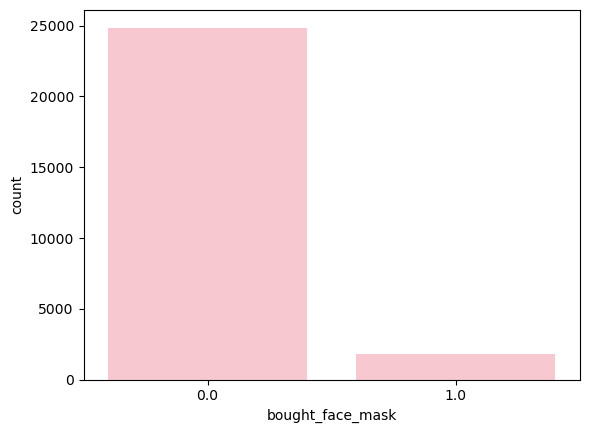

In [176]:
sns.countplot(x="bought_face_mask",data=df,color='pink')
plt.show()

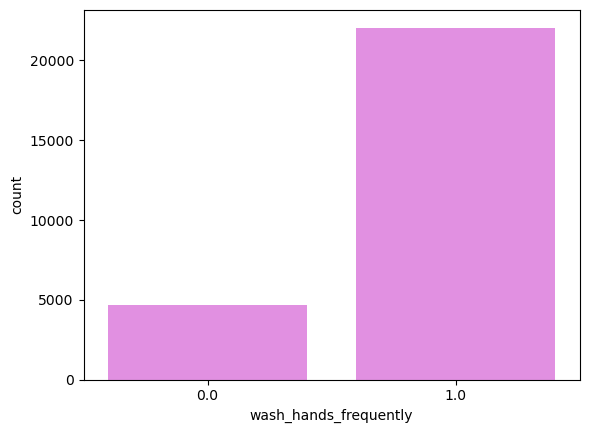

In [177]:
sns.countplot(x="wash_hands_frequently",data=df,color='violet')
plt.show()

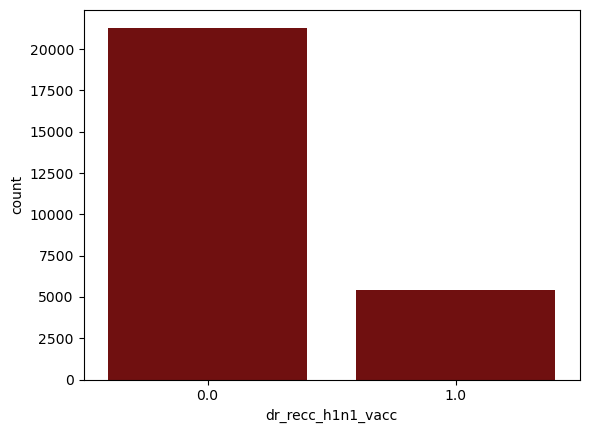

In [178]:
sns.countplot(x="dr_recc_h1n1_vacc",data=df,color='maroon')
plt.show()

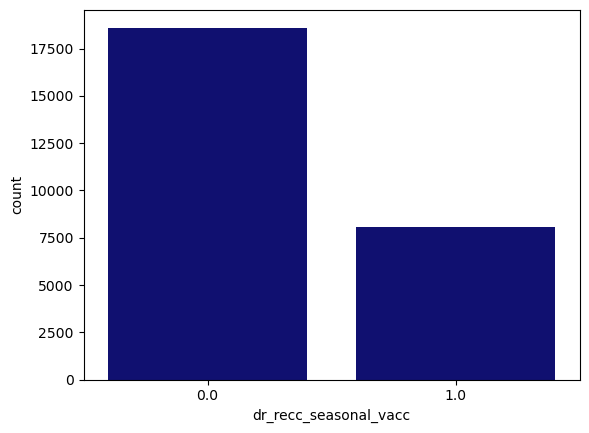

In [179]:
sns.countplot(x="dr_recc_seasonal_vacc",data=df,color='navy')
plt.show()

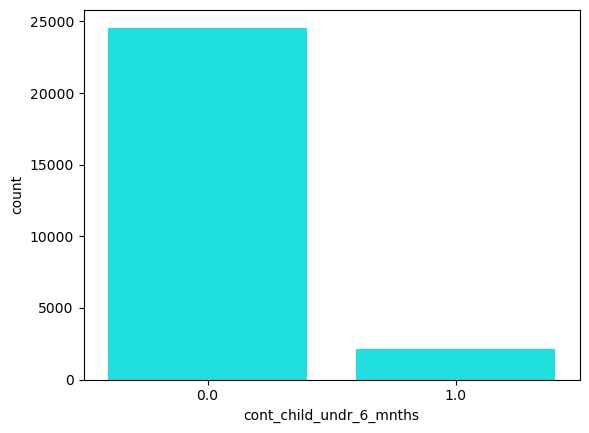

In [180]:
sns.countplot(x="cont_child_undr_6_mnths",data=df,color='cyan')
plt.show()

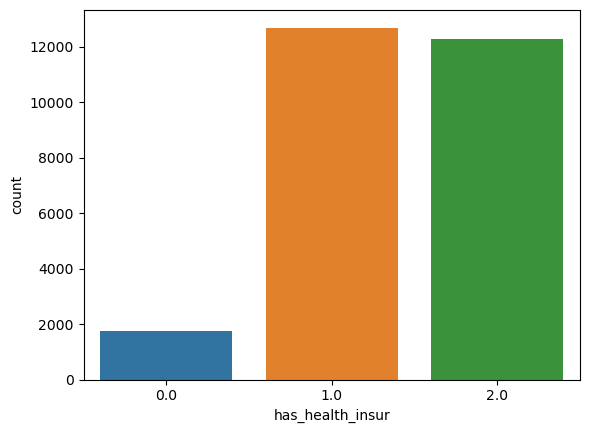

In [181]:
sns.countplot(x="has_health_insur",data=df)
plt.show()

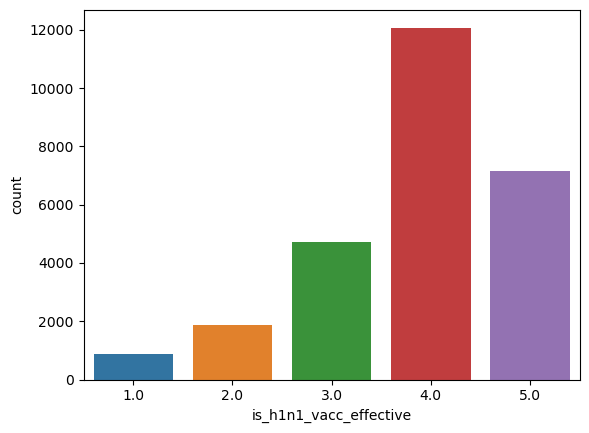

In [182]:
sns.countplot(x="is_h1n1_vacc_effective",data=df)
plt.show()

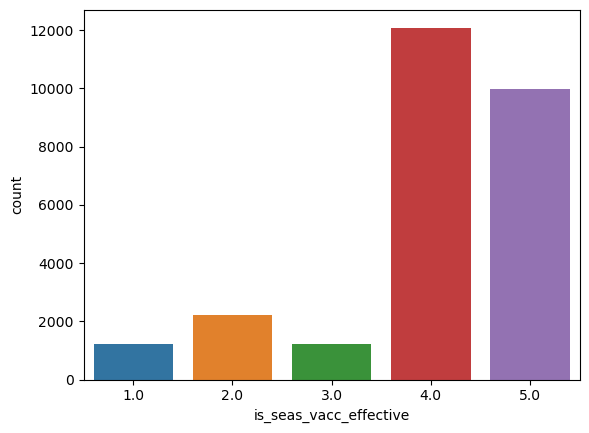

In [183]:
sns.countplot(x="is_seas_vacc_effective",data=df)
plt.show()

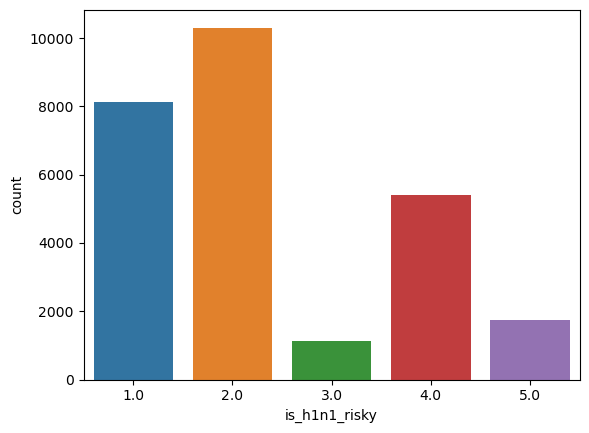

In [184]:
sns.countplot(x="is_h1n1_risky",data=df)
plt.show()

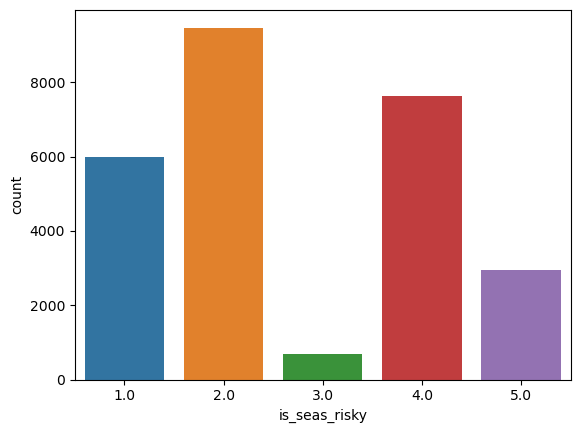

In [185]:
sns.countplot(x="is_seas_risky",data=df)
plt.show()

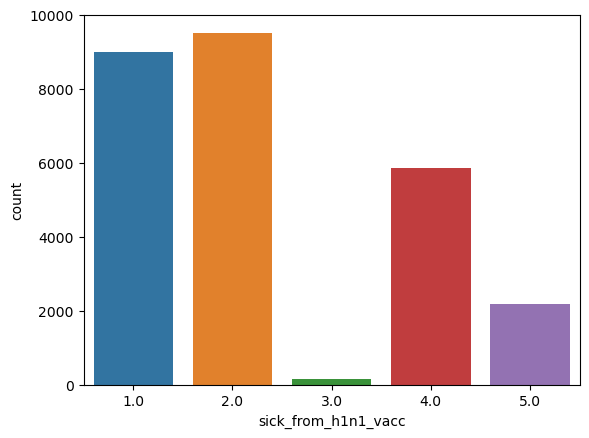

In [186]:
sns.countplot(x="sick_from_h1n1_vacc",data=df)
plt.show()

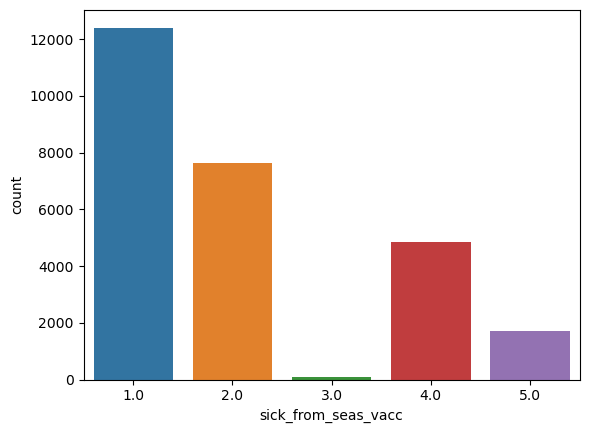

In [187]:
sns.countplot(x="sick_from_seas_vacc",data=df)
plt.show()

C:\Users\aditi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


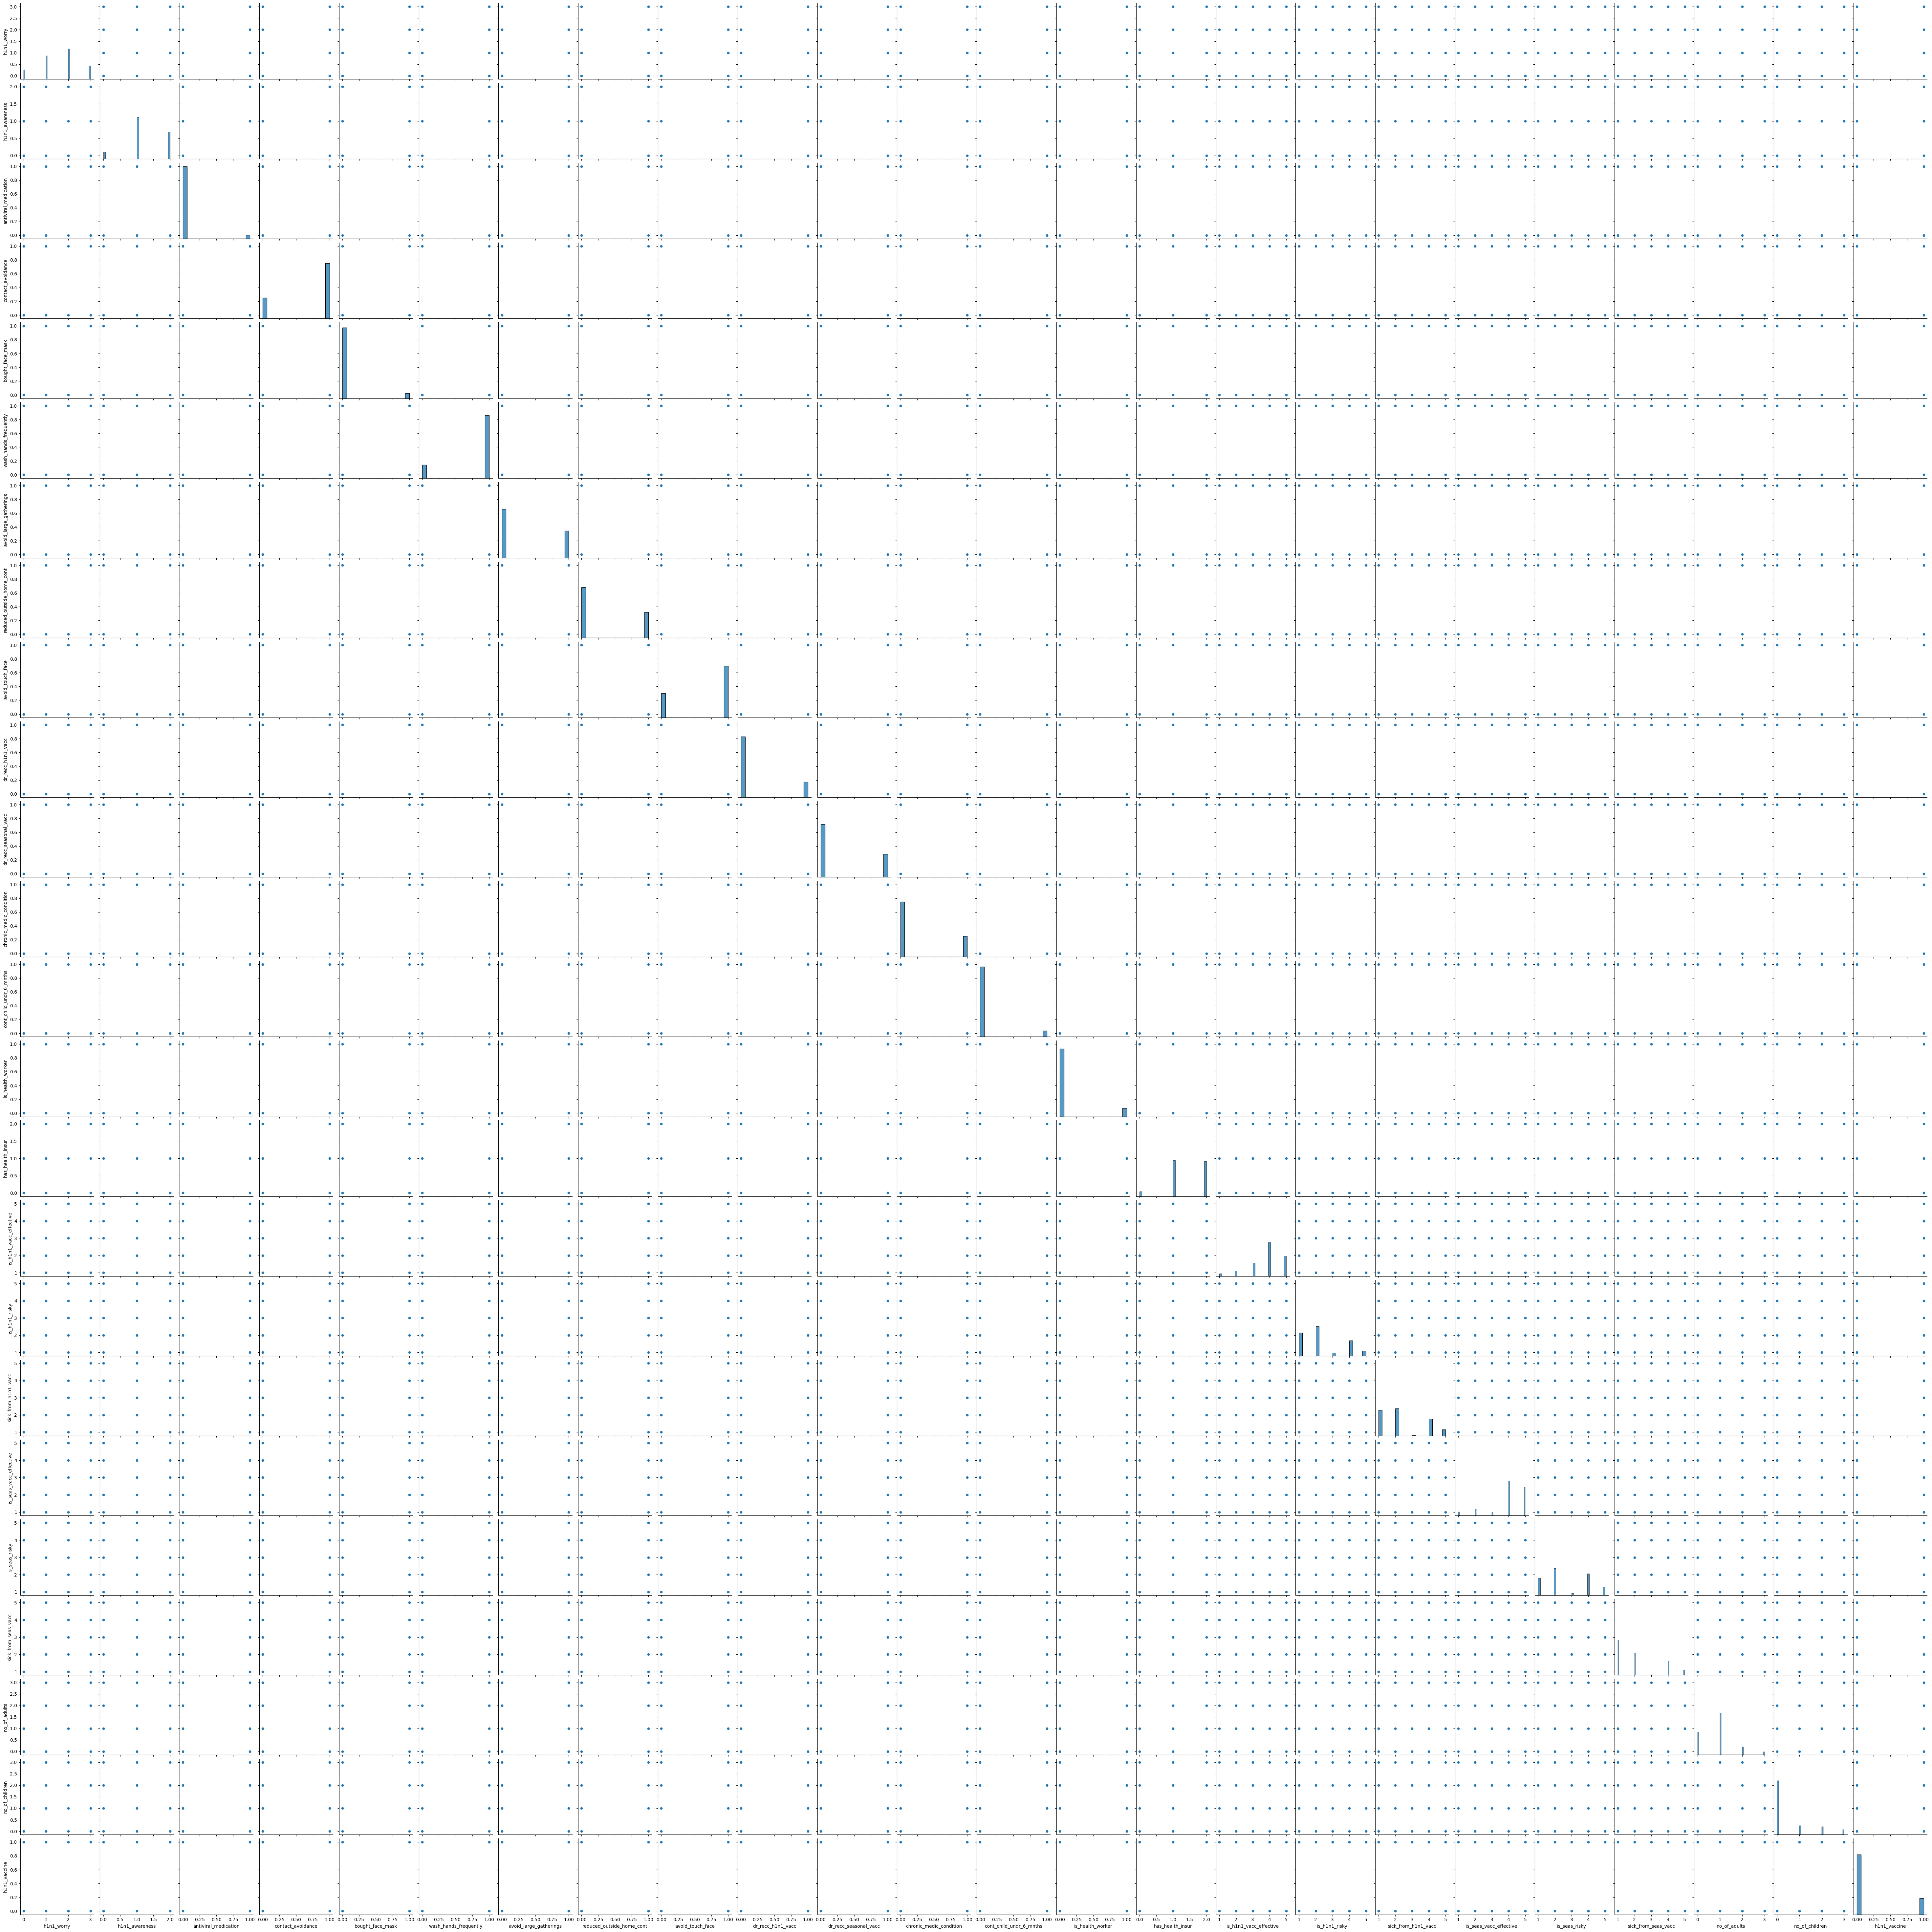

In [189]:
sns.pairplot(df)

In [190]:
df1 = df.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
df1.dtypes.value_counts()

object    33
Name: count, dtype: int64

In [191]:
df_dummy = pd.get_dummies(df1, drop_first= True )

In [192]:
df_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

h1n1_vaccine_1
False    0.787546
True     0.212454
Name: proportion, dtype: float64

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [198]:
Y=df_dummy['h1n1_vaccine_1']
X=df_dummy.drop(['h1n1_vaccine_1'], axis=1)

In [199]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
log = LogisticRegression()

In [227]:
log.fit(X_train,Y_train)

LogisticRegression()

In [228]:
log.score(X_train, Y_train)

0.8523590456831068

In [229]:
log.score(X_test, Y_test)

0.8527392986397104

In [288]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns

In [290]:
predictions=log.predict(X_test)                                

<Axes: >

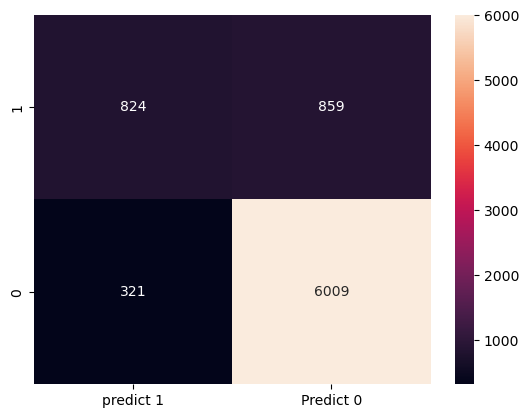

In [291]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame (cm, index = [i for i in ["1","0"]],
                    columns=[i for i in ["predict 1" , "Predict 0"]])
sns.heatmap(df_cm , annot=True, fmt='g')

In [292]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
model_dtc=DecisionTreeClassifier()

In [294]:
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [295]:
model_dtc.score(X_test,Y_test)

0.7631349057781106

In [296]:
model_dtc.score(X_train,Y_train)

1.0

In [297]:
from sklearn.ensemble import BaggingClassifier

In [298]:
model_bcl=BaggingClassifier()

In [299]:
model_bcl.fit(X_train,Y_train)

BaggingClassifier()

In [300]:
model_bcl.score(X_train,Y_train)

0.9845939873756285

In [301]:
model_bcl.score(X_test,Y_test)

0.8387620117309372

In [302]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [303]:
model_abc=AdaBoostClassifier()
model_gbc=GradientBoostingClassifier()
model_rfc=RandomForestClassifier()

In [304]:
model_abc.fit(X_train,Y_train)

AdaBoostClassifier()

In [305]:
model_abc.score(X_train,Y_train)

0.8507542527014015

In [306]:
model_abc.score(X_test,Y_test)

0.8507425433670286

In [307]:
model_gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [308]:
model_gbc.score(X_train,Y_train)

0.8559965764416391

In [309]:
model_gbc.score(X_test,Y_test)

0.8552352427305628

In [310]:
model_rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [311]:
model_rfc.score(X_train,Y_train)

0.9999465069006098

In [312]:
model_rfc.score(X_test,Y_test)

0.8549856483214776

In [313]:
from sklearn.svm import SVC

In [314]:
model_svc=SVC(kernel='linear')

In [315]:
model_svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [316]:
model_svc.score(X_train,Y_train)

0.8515566491922542

In [317]:
model_svc.score(X_test,Y_test)

0.8533632846624236

In [318]:
from sklearn.svm import SVR

In [319]:
model_svr=SVR()

In [320]:
model_svr.fit(X_train,Y_train)

SVR()

In [321]:
model_svr.score(X_train,Y_train)

0.6258065290348285

In [322]:
model_svr.score(X_test,Y_test)

0.3122649965097798